In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import os

original_dir = os.getcwd()
os.chdir('..')

from decision_plotting import DecisionRegionPlotter
os.chdir(original_dir)

In [2]:
drp = DecisionRegionPlotter()

In [23]:
# Creating Non_linear Dataset 1:
# Use XOR 

X_xor = np.random.randn(250, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

X_xor_train, X_xor_test, y_xor_train, y_xor_test = train_test_split(X_xor, y_xor, test_size=0.25, stratify=y_xor)

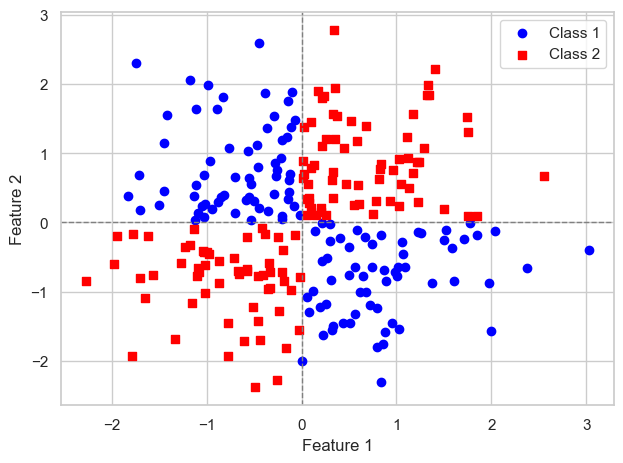

In [24]:
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='blue', marker='o', label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], c='red', marker='s', label='Class 2')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
svm_kernel = SVC(kernel='rbf', random_state=42, gamma=0.1, C=10.0) # Gamma here is related to variance of the RBF (gaussian) by gamma = 1/ 2 \sigma^2
# RBF kernel : k(xi, xj) = exp(-gamma |xi - xj|^2)
svm_kernel.fit(X_xor_train, y_xor_train)

SVC(C=10.0, gamma=0.1, random_state=42)

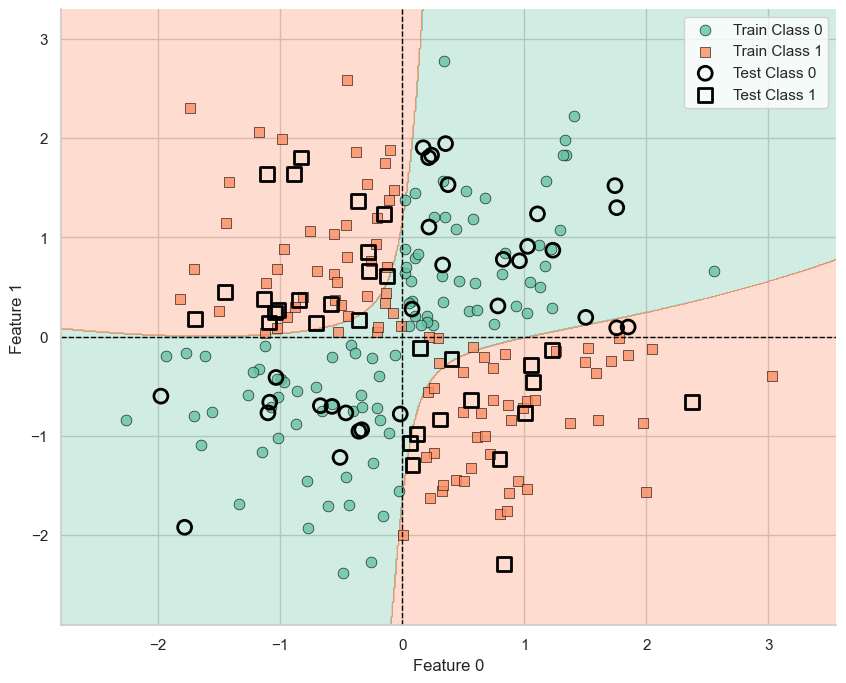

The RBF kernel SVM accuracy on the XOR dataset is 90.48%.


In [29]:
drp.plot_decision_regions(X_train=X_xor_train, y_train=y_xor_train, X_test=X_xor_test, y_test=y_xor_test, classifier=svm_kernel, resolution=0.01)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

acc_kernel_xor = np.sum(svm_kernel.predict(X_xor_test) == y_xor_test)/len(y_xor_test)
print(f"The RBF kernel SVM accuracy on the XOR dataset is {acc_kernel_xor*100:.2f}%.")

In [7]:
# Creating Non-Linear Dataset 2

rng = np.random.default_rng()
radius1_data = 1 + rng.normal(scale=0.2, size=100)
radius2_data = 2 + rng.normal(scale=0.2, size=100)

theta1_data = rng.uniform(0, 2*np.pi, 100)
theta2_data = rng.uniform(0, 2*np.pi, 100)

X_circ = np.array([[r * np.cos(th), r * np.sin(th)] for r, th in zip(radius1_data, theta1_data)] + [[r * np.cos(th), r * np.sin(th)] for r, th in zip(radius2_data, theta2_data)])
y_circ = np.concatenate((np.zeros_like(radius1_data), np.ones_like(radius1_data)))

idx_shuffle = rng.permutation(range(len(y_circ)))

X_circ = X_circ[idx_shuffle]
y_circ = y_circ[idx_shuffle]

X_circ_train, X_circ_test, y_circ_train, y_circ_test = train_test_split(X_circ, y_circ, test_size=0.25, stratify=y_circ)

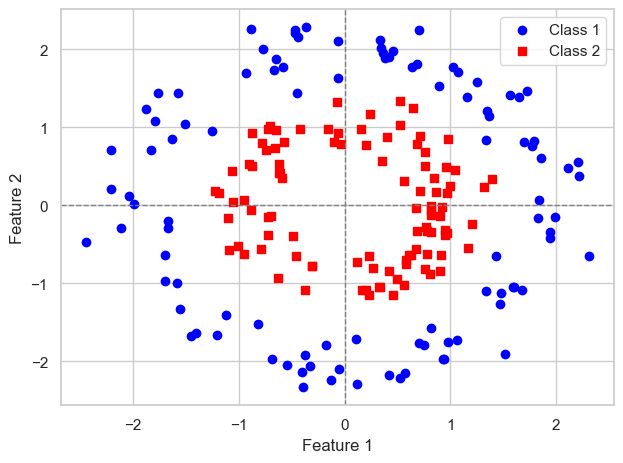

In [8]:
plt.scatter(X_circ[y_circ == 1, 0], X_circ[y_circ == 1, 1], c='blue', marker='o', label='Class 1')
plt.scatter(X_circ[y_circ == 0, 0], X_circ[y_circ == 0, 1], c='red', marker='s', label='Class 2')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
svm_circ = SVC(kernel='rbf', degree=2, gamma=0.1, C=1.0).fit(X_circ_train, y_circ_train)

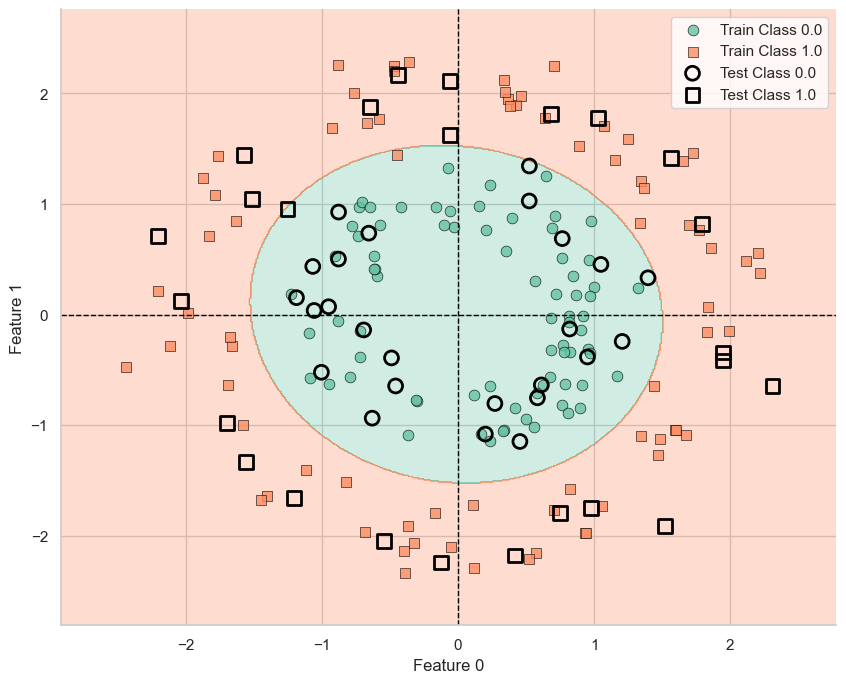

The RBF kernel SVM accuracy on the circular dataset is 90.48%.


In [37]:
drp.plot_decision_regions(X_train=X_circ_train, y_train=y_circ_train, X_test=X_circ_test, y_test=y_circ_test, classifier=svm_circ, resolution=0.01)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

acc_kernel_circ = np.sum(svm_circ.predict(X_circ_test) == y_circ_test)/len(y_circ_test)
print(f"The RBF kernel SVM accuracy on the circular dataset is {acc_kernel_xor*100:.2f}%.")

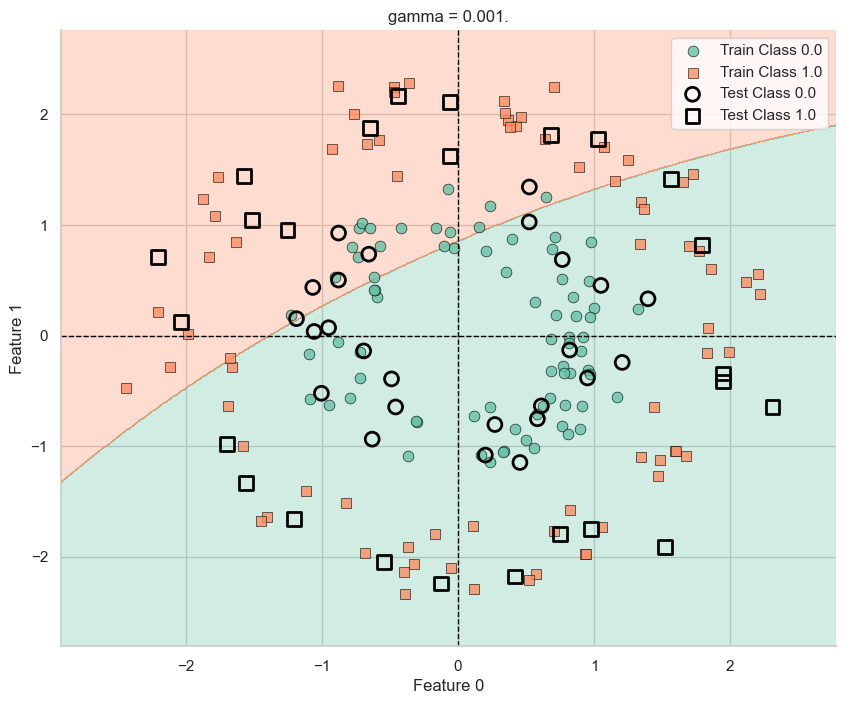

The RBF kernel SVM accuracy on the circular dataset is 90.48%.


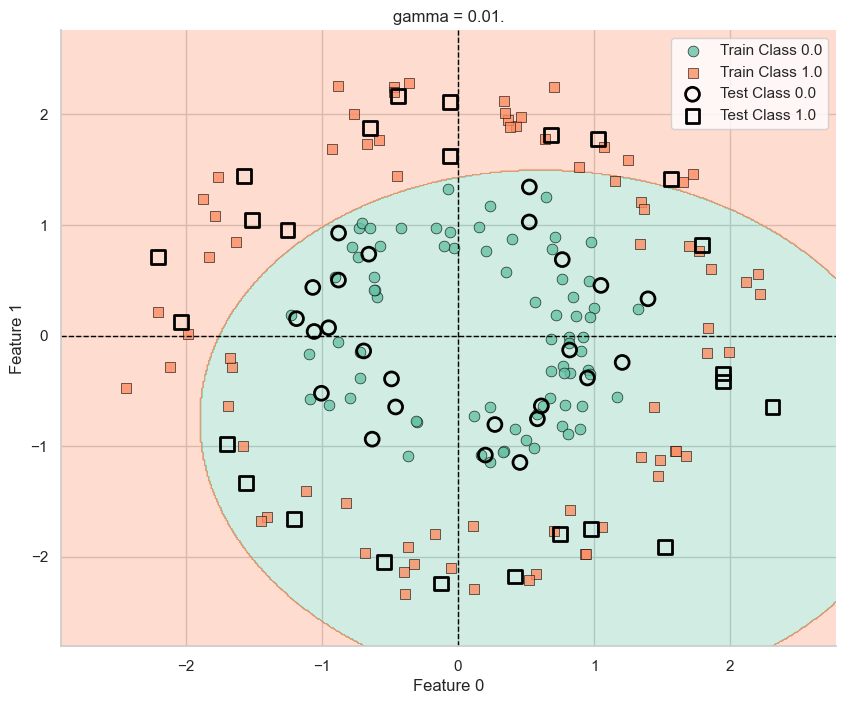

The RBF kernel SVM accuracy on the circular dataset is 90.48%.


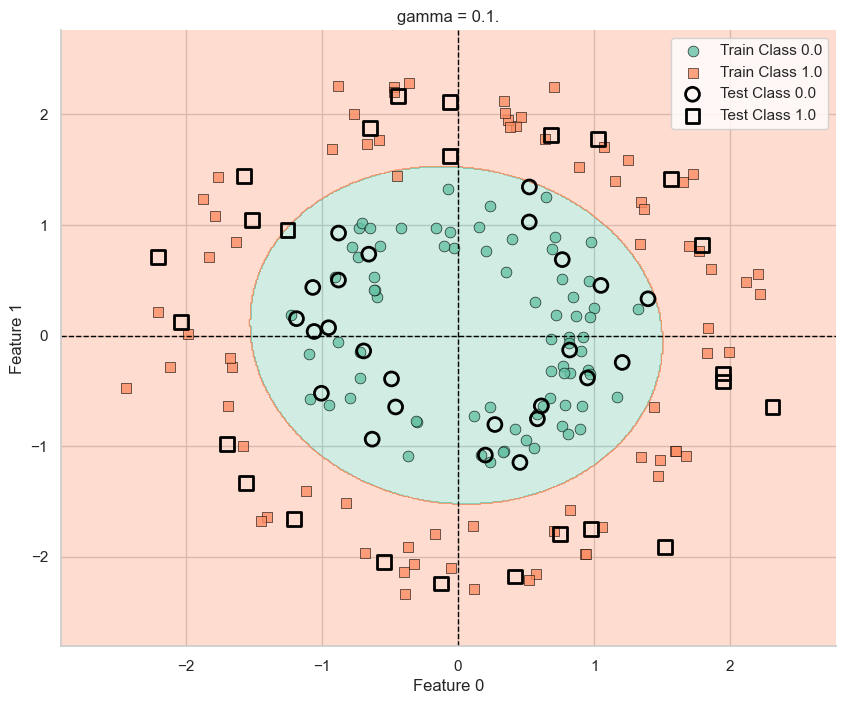

The RBF kernel SVM accuracy on the circular dataset is 90.48%.


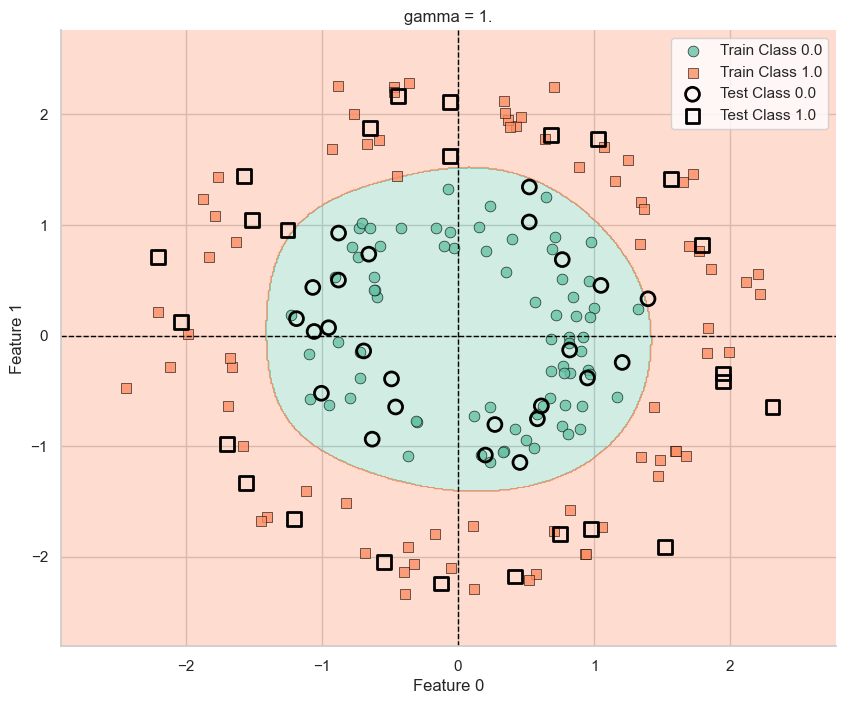

The RBF kernel SVM accuracy on the circular dataset is 90.48%.


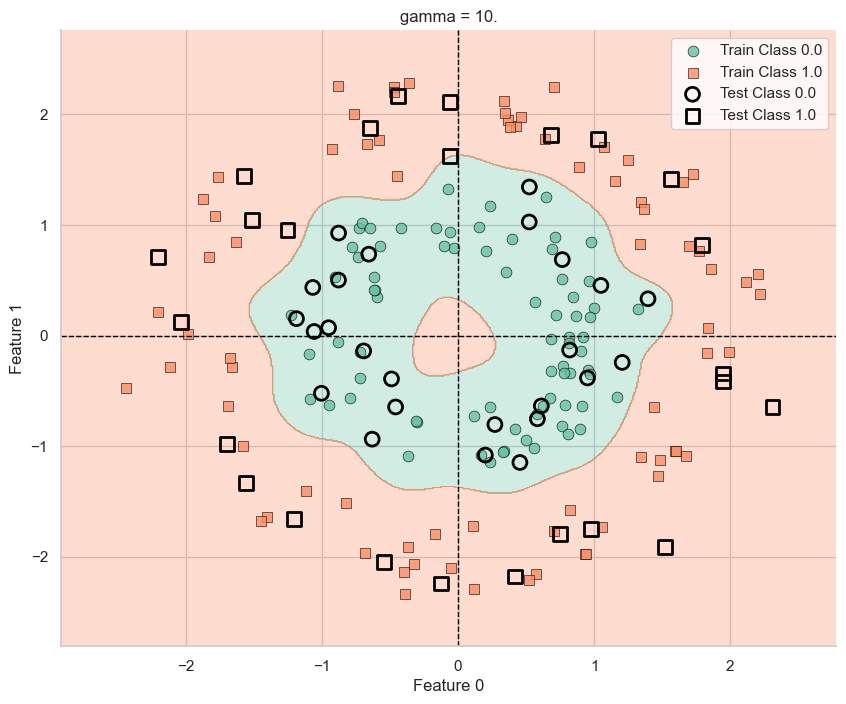

The RBF kernel SVM accuracy on the circular dataset is 90.48%.


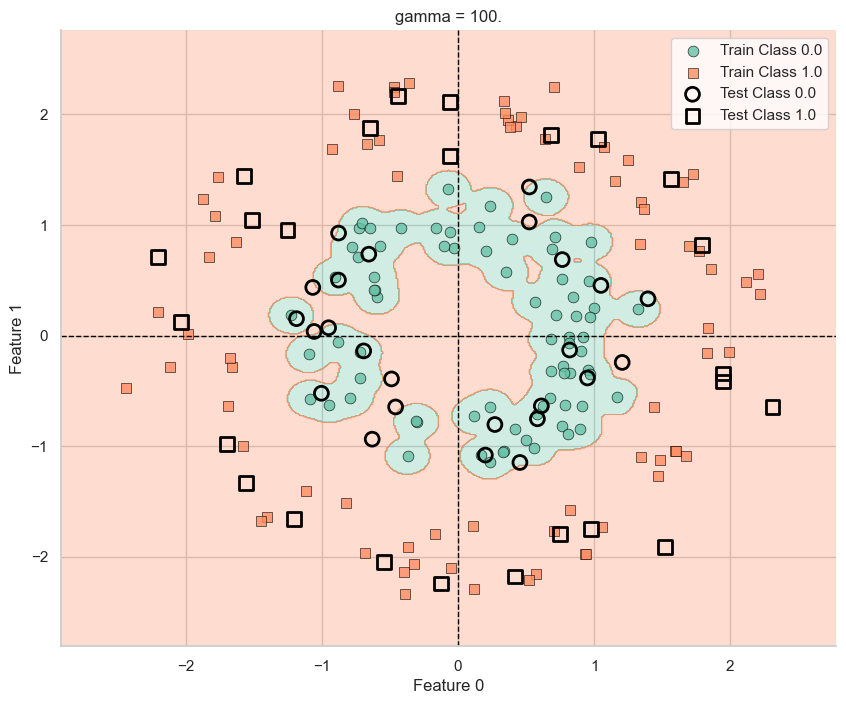

The RBF kernel SVM accuracy on the circular dataset is 90.48%.


In [39]:
for i in range(-3, 3):
    gamma = 10 ** i
    svm_circ = SVC(kernel='rbf', degree=2, gamma=gamma, C=1.0).fit(X_circ_train, y_circ_train)
    drp.plot_decision_regions(X_train=X_circ_train, y_train=y_circ_train, X_test=X_circ_test, y_test=y_circ_test, classifier=svm_circ, resolution=0.01)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.title(f"gamma = {gamma}.")
    plt.show()

    acc_kernel_circ = np.sum(svm_circ.predict(X_circ_test) == y_circ_test)/len(y_circ_test)
    print(f"The RBF kernel SVM accuracy on the circular dataset is {acc_kernel_xor*100:.2f}%.")

Clearly, the generalizability worsens with gamma significantly deviating from 0.1 to 1.